In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [18]:
data = load_iris()
df = pd.DataFrame(data.data,columns=data.feature_names)
df["target"] = data.target_names[data.target]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
sc = StandardScaler()
X = df.drop(["target"],axis=1).values
y=df["target"].values

standarized_X = sc.fit_transform(X)

In [20]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(standarized_X)

new_df = pd.DataFrame(reduced_X,columns=["PCA1","PCA2"])
new_df["target"] = y

new_df.head()

,PCA1,PCA2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


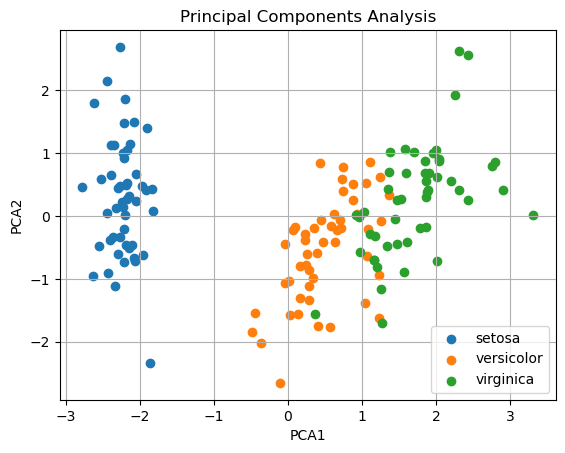

In [21]:
plt.title("Principal Components Analysis")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

for target in data.target_names:
    idxs = y == target
    scatter = plt.scatter(reduced_X[idxs, 0],reduced_X[idxs, 1],label = target)
plt.legend()
plt.grid()
plt.show()